In [1]:
import pandas as pd
import numpy as np

from pathlib import Path
from docx import Document
from transformers import pipeline

c:\Users\charl\miniconda3\envs\nlp_fs\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
agent_classifier = pipeline("text-classification", model="Moritz-Pfeifer/CentralBankRoBERTa-agent-classifier")

Device set to use cpu


In [3]:
# Load the SentimentClassifier model
sentiment_classifier = pipeline("text-classification", model="Moritz-Pfeifer/CentralBankRoBERTa-sentiment-classifier")

Device set to use cpu


In [4]:
agent_result = agent_classifier("We used our liquidity tools to make funding available to banks that might need it.")
print("Agent Classification:", agent_result[0]['label'])

# Returns: Agent Classification: Financial Sector
# agent_result has structure [{'label': 'Financial Sector', 'score': 0.9753041863441467}]

Agent Classification: Financial Sector


In [5]:
sentiment_result = sentiment_classifier("We used our liquidity tools to make funding available to banks that might need it.")
print("Sentiment Classification:", sentiment_result[0]['label'])

# Returns: Sentiment Classification: positive
# sentiment_result has structure [{'label': 'positive', 'score': 0.8233762383460999}]

Sentiment Classification: positive


In [20]:
long_chunk = "Domestically, UK household and corporate borrowers are likely to remain resilient in aggregate. The UK banking system is in a strong position to support households and businesses, even if economic, financial and business conditions were to be substantially worse than expected, as demonstrated by the results of the 2024 desk-based stress test."
agent_long = agent_classifier(long_chunk)
sentiment_long = sentiment_classifier(long_chunk)

print("Agent Classification:", agent_long[0]['label'])
print("Sentiment Classification:", sentiment_long[0]['label'])

Agent Classification: Financial Sector
Sentiment Classification: positive


In [21]:
sentiment_long

[{'label': 'positive', 'score': 0.7588902115821838}]

In [6]:
def read_and_split_word_doc(file_path):
    """
    Reads the text of a Word document and splits it into chunks wherever there is a new line character.

    Parameters:
        file_path (str): The path to the Word document.

    Returns:
        list: A list of text chunks split by new lines.
    """
    # Load the Word document
    document = Document(file_path)

    # Extract all text from the document
    full_text = ""
    for paragraph in document.paragraphs:
        full_text += paragraph.text + "\n"  # Add a new line after each paragraph to maintain structure

    # Split the text into chunks based on new line characters
    chunks = full_text.split("\n")

    # Removes:
    # - empty strings
    # - Chunks that don't end with a full stop
    # - Chunks that don't start with a capital letter
    chunks = [chunk for chunk in chunks if chunk.strip() != "" and chunk[-1] == "." and chunk[0].isupper()]

    # Remove chunks that start with "Source:" or "Sources:"
    chunks = [chunk for chunk in chunks if not chunk.startswith("Source:") and not chunk.startswith("Sources:")]

    return chunks


In [7]:
# Path agnostic way to get the path to the reports (as long as Data/Reports is there)
path_to_docs = Path.cwd() / "Data" / "Reports"

In [10]:
doc = "2020_2.docx"
test = read_and_split_word_doc(path_to_docs / doc)

In [11]:
test

['The Financial Policy Committee (FPC) aims to ensure the UK financial system is prepared for, and resilient to, the wide range of risks it could face — so that the system can serve UK households and businesses in bad times as well as good.',
 'UK households and businesses have needed support from the financial system to weather the economic disruption associated with Covid-19 (Covid). The financial system has so far provided that support, reflecting the resilience that has been built up since the global financial crisis, and the extraordinary policy responses of the UK authorities.',
 'Businesses have raised substantial external financing since the start of the Covid pandemic from banks and financial markets, to help finance their cash-flow deficits. Households’ debt-servicing burdens have fallen during that period, supported by payment deferrals from lenders. The extension of the Coronavirus Job Retention Scheme has supported household incomes.',
 'Although there have been encouragin

In [26]:
# Send each element of the list to the agent and sentiment classifiers
agent_results = [agent_classifier(chunk) for chunk in test]
sentiment_results = [sentiment_classifier(chunk) for chunk in test]

# Extract the labels from the results
agent_labels = [result[0]['label'] for result in agent_results]
sentiment_labels = [result[0]['label'] for result in sentiment_results]

# Extract the scores from the results
agent_scores = [result[0]['score'] for result in agent_results]
sentiment_scores = [result[0]['score'] for result in sentiment_results]

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    "Text Chunk": test,
    "Agent Label": agent_labels,
    "Agent Score": agent_scores,
    "Sentiment Label": sentiment_labels,
    "Sentiment Score": sentiment_scores
})

array([<Axes: title={'center': 'negative'}>,
       <Axes: title={'center': 'positive'}>], dtype=object)

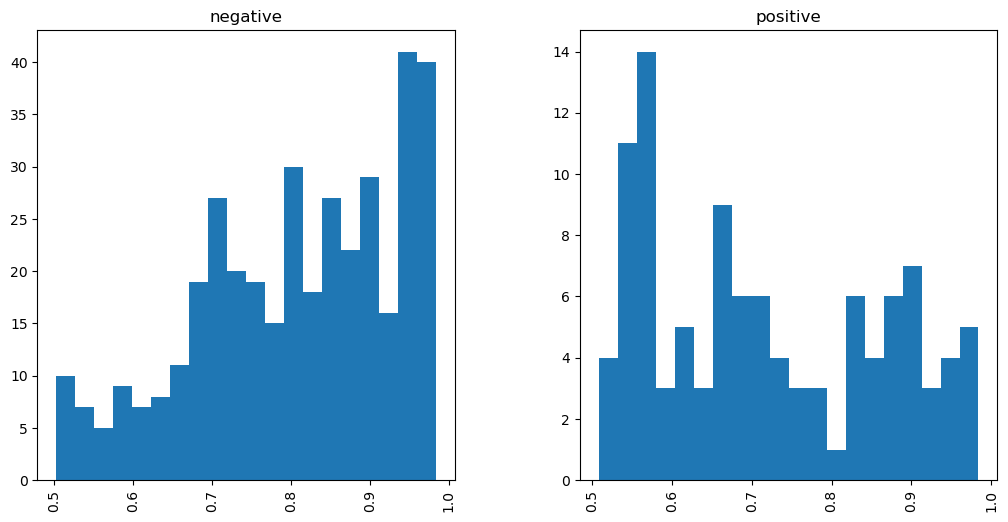

In [27]:
# Average sentiment score by sentiment label
results_df.groupby("Sentiment Label")["Sentiment Score"].mean()
# We see that average sentiment score is noticably higher for negative than positive sentiment

# histogram of sentiment scores by sentiment label
results_df.hist(column="Sentiment Score", by="Sentiment Label", bins=20, figsize=(12, 6))
# Negative label has most of its scores above 0.9 and then a fairly uniform distribution between 0.5 and 0.9
# Positive label label is much choppyer with 

In [ ]:
# Looping through various reports

docs_post05 = ["2024_2.docx", "2024_1.docx", "2023_2.docx", "2023_1.docx", "2022_2.docx", "2022_1.docx", "2021_2.docx", "2021_1.docx",
        "2020_2.docx", "2020_1.docx", "2019_2.docx", "2019_1.docx", "2018_2.docx", "2018_1.docx", "2017_2.docx", "2017_1.docx", 
        "2016_2.docx", "2016_1.docx", "2015_2.docx", "2015_1.docx", "2014_2.docx", "2014_1.docx", "2013_2.docx", "2013_1.docx",
        "2012_2.docx", "2012_1.docx", "2011_2.docx", "2011_1.docx", "2010_2.docx", "2010_1.docx", "2009_2.docx", "2009_1.docx",
        "2008_2.docx", "2008_1.docx", "2007_2.docx", "2007_1.docx", "2006_1.docx"] # only one report in 2006
docs_pre05 = ["2005_2.docx", "2005_1.docx", "2004_2.docx", "2004_1.docx", "2003_2.docx", "2003_1.docx", "2002_2.docx", "2002_1.docx",
              "2001_2.docx", "2001_1.docx", "2000_2.docx", "2000_1.docx"]
# May want to remove 05 and before because it was 'Financial Stability Review', more journalistic
#docs = docs_post05 + docs_pre05
docs = docs_post05 # only post 2005

# Create an empty DataFrame to store the results of all the reports
full_results_df = pd.DataFrame(
    columns=["Text Chunk", "Agent Label", "Agent Score", "Sentiment Label", "Sentiment Score", "Report"]
)

for doc in docs:
    chunked_doc = read_and_split_word_doc(path_to_docs / doc)
    
    # list of dictionaries of results for eah chunk in chunked_doc
    agent_results = [agent_classifier(chunk) for chunk in chunked_doc]
    sentiment_results = [sentiment_classifier(chunk) for chunk in chunked_doc]

    # Extract labels and scores from results
    agent_scores = [result[0]['score'] for result in agent_results]
    agent_labels = [result[0]['label'] for result in agent_results]
    sentiment_scores = [result[0]['score'] for result in sentiment_results]
    sentiment_labels = [result[0]['label'] for result in sentiment_results]

    # Create a DataFrame for this document
    doc_df = pd.DataFrame({
        "Text Chunk": chunked_doc,
        "Agent Label": agent_labels,
        "Agent Score": agent_scores,
        "Sentiment Label": sentiment_labels,
        "Sentiment Score": sentiment_scores,
        "Report": doc
    })

    # Concatenate the DataFrame to the full_results_df
    full_results_df = pd.concat([full_results_df, doc_df])




C:\Users\charl\AppData\Local\Temp\ipykernel_15672\2509142131.py:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  full_results_df = pd.concat([full_results_df, doc_df])


In [ ]:
# Save the results to a CSV file
full_results_df.to_csv("full_results.csv", index=False)

array([<Axes: title={'center': 'negative'}>,
       <Axes: title={'center': 'positive'}>], dtype=object)

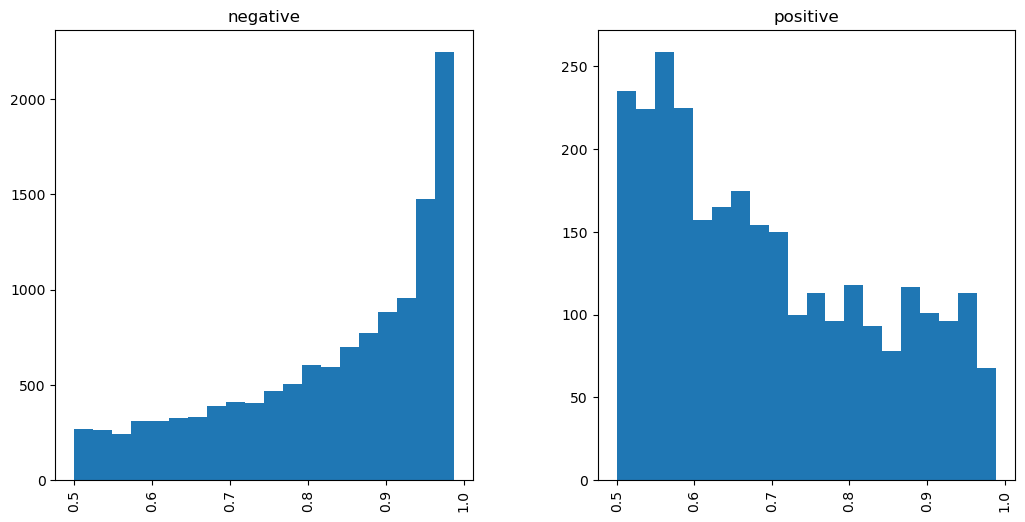

In [32]:
full_results_df.hist(column="Sentiment Score", by="Sentiment Label", bins=20, figsize=(12, 6))